<a href="https://colab.research.google.com/github/ckriztian/Energia_Electrica_TDF/blob/main/ConsumoEnergiaElectrica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# **Carga de Datos**

In [2]:
# Cargando dataframe
drive.mount('/content/drive')
dataframe = pd.read_excel('/content/drive/My Drive/Colab Notebooks/AprendizajeAutomatico/DataSet/15_3_01_Energia_electrica_consumida_por_tipo_usuario-5.xlsx', sheet_name="Total TDF", header=3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Exploración inicial de datos**

In [3]:
# Visualización  de cantidad de instancias y columnas.
num_instancias, num_columnas = dataframe.shape
print(f'Cantidad de instancias: {num_instancias}')
print(f'Cantidad de columnas: {num_columnas}')

Cantidad de instancias: 182
Cantidad de columnas: 8


In [4]:
# Tipo de datos, Muestreo y Estadísticas descriptivas
print(dataframe.dtypes)
print("______________")
print(dataframe.head())
print("______________")
print(dataframe.describe())

Unnamed: 0              object
Período                 object
Total                   object
Grandes \nDemandas      object
Medianas \nDemandas     object
Uso\n Residencial       object
Uso \nGeneral           object
Alumbrado \nPúblico     object
dtype: object
______________
  Unnamed: 0  Período     Total Grandes \nDemandas Medianas \nDemandas  \
0        NaN      NaN       kWh                NaN                 NaN   
1        NaN      NaN       NaN                NaN                 NaN   
2       2010    Enero  28389813           14295431             1895533   
3        NaN  Febrero  29604832           14258851             2454954   
4        NaN    Marzo  31100802           16086916             2404916   

  Uso\n Residencial Uso \nGeneral Alumbrado \nPúblico   
0               NaN           NaN                  NaN  
1               NaN           NaN                  NaN  
2           8505506       2752545               940798  
3           7957003       3910403              102

# **Correción y limpieza del Dataset**

In [5]:
# Eliminar las filas 1 y 2 (índices 0 y 1)
dataframe = dataframe.drop([0, 1]).reset_index(drop=False)
dataframe.head()

,index,Unnamed: 0,Período,Total,Grandes \nDemandas,Medianas \nDemandas,Uso\n Residencial,Uso \nGeneral,Alumbrado \nPúblico
0,2,2010,Enero,28389813,14295431,1895533,8505506,2752545,940798
1,3,NaN,Febrero,29604832,14258851,2454954,7957003,3910403,1023621
2,4,NaN,Marzo,31100802,16086916,2404916,8382174,2837123,1389673
3,5,NaN,Abril,34441839,15568924,2991200,9663763,4604950,1613002
4,6,NaN,Mayo,32849499,15230025,2664536,9744634,3245695,1964609


In [6]:
# Renombrar características
dataframe = dataframe.rename(columns={
    "Unnamed: 0": "Año",
    "Período": "Meses",
    "Grandes \nDemandas": "Grandes Demandas",
    "Medianas \nDemandas": "Medianas Demandas",
    "Uso\n Residencial": "Uso Residencial",
    "Uso \nGeneral": "Uso General",
    "Alumbrado \nPúblico ": "Alumbrado Público"
})

print(dataframe.columns)

Index(['index', 'Año', 'Meses', 'Total', 'Grandes Demandas',
       'Medianas Demandas', 'Uso Residencial', 'Uso General',
       'Alumbrado Público'],
      dtype='object')


In [7]:
# Verificar si existen caracteres tipo "espacio" en los valores.

for column in dataframe.columns:
    # Convertir a string para evitar errores con tipos no string
    column_as_string = dataframe[column].astype(str)

    # Detectar espacios al inicio
    espacios_al_inicio = column_as_string.str.startswith(' ')

    # Verificar si hay valores con espacios al inicio
    if espacios_al_inicio.any():
        valores_con_espacios_inicio = dataframe[espacios_al_inicio]
        print(f"\nValores con espacios al inicio en '{column}':")
        print(valores_con_espacios_inicio)

In [8]:
# Eliminar espacios en blanco al principio y al final de todos los valores en el DataFrame
df = dataframe.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Mostrar el DataFrame actualizado
print(dataframe)

     index                                                Año    Meses  \
0        2                                               2010    Enero   
1        3                                                NaN  Febrero   
2        4                                                NaN    Marzo   
3        5                                                NaN    Abril   
4        6                                                NaN     Mayo   
..     ...                                                ...      ...   
175    177                                                NaN      NaN   
176    178  Nota: Los años 2010 a 2016 no incluyen el cons...      NaN   
177    179  ...Dato no disponible a la fecha de presentaci...      NaN   
178    180                                                NaN      NaN   
179    181  Fuente: Dirección Provincial de Energía Ushuai...      NaN   

        Total Grandes Demandas Medianas Demandas Uso Residencial Uso General  \
0    28389813         14295431 

<ipython-input-8-8d8a0c7dff76>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = dataframe.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [9]:
# Completar instancias de año vacias con el año correspondiente
dataframe["Año"] = dataframe["Año"].ffill()

In [10]:
# Renombrar los nombres de meses con números enteros.

# Eliminar espacios en blanco al principio y al final de los nombres de los meses
dataframe['Meses'] = dataframe['Meses'].str.strip()

# Convertir nombre de meses a numeros
meses_a_numeros = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4,
    'Mayo': 5, 'Junio': 6, 'Julio': 7, 'Agosto': 8,
    'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

dataframe['Meses'] = dataframe['Meses'].map(meses_a_numeros)


In [11]:
# Calcula el numero de valores nullos de cada columna
null_counts = dataframe.isnull().sum()
print(null_counts)

index                0
Año                  0
Meses                5
Total                5
Grandes Demandas     5
Medianas Demandas    5
Uso Residencial      5
Uso General          5
Alumbrado Público    5
dtype: int64


In [12]:
# Vemos las instancias nulas almacenadas en "filas_nulas"
filas_nulas = dataframe[dataframe.isnull().any(axis=1)]
print(filas_nulas)

     index                                                Año  Meses Total  \
175    177                                               2024    NaN   NaN   
176    178  Nota: Los años 2010 a 2016 no incluyen el cons...    NaN   NaN   
177    179  ...Dato no disponible a la fecha de presentaci...    NaN   NaN   
178    180  ...Dato no disponible a la fecha de presentaci...    NaN   NaN   
179    181  Fuente: Dirección Provincial de Energía Ushuai...    NaN   NaN   

    Grandes Demandas Medianas Demandas Uso Residencial Uso General  \
175              NaN               NaN             NaN         NaN   
176              NaN               NaN             NaN         NaN   
177              NaN               NaN             NaN         NaN   
178              NaN               NaN             NaN         NaN   
179              NaN               NaN             NaN         NaN   

    Alumbrado Público  
175               NaN  
176               NaN  
177               NaN  
178           

In [13]:
# Eliminar las filas nulas de la variable creada "filas_nulas" del DataFrame original
dataframe = dataframe.drop(filas_nulas.index)

In [14]:
# Verificación nuevamente de filas_nulas
null_counts = dataframe.isnull().sum()
print(null_counts)

index                0
Año                  0
Meses                0
Total                0
Grandes Demandas     0
Medianas Demandas    0
Uso Residencial      0
Uso General          0
Alumbrado Público    0
dtype: int64


In [15]:
# Visualizar el tipo de dato de cada columna
print(dataframe.dtypes)

index                  int64
Año                   object
Meses                float64
Total                 object
Grandes Demandas      object
Medianas Demandas     object
Uso Residencial       object
Uso General           object
Alumbrado Público     object
dtype: object


In [16]:
# Lista de columnas en las que deseas realizar el reemplazo
columns_to_replace = [
    'Año',
    'Total',
    'Grandes Demandas',
    'Medianas Demandas',
    'Uso Residencial',
    'Alumbrado Público'
]

# Reemplazar valores no válidos por NaN en las columnas especificadas usando loc
for column in columns_to_replace:
    dataframe.loc[dataframe[column] == '...', column] = np.nan

# Verificar el resultado
print(dataframe.head())

   index   Año  Meses     Total Grandes Demandas Medianas Demandas  \
0      2  2010    1.0  28389813         14295431           1895533   
1      3  2010    2.0  29604832         14258851           2454954   
2      4  2010    3.0  31100802         16086916           2404916   
3      5  2010    4.0  34441839         15568924           2991200   
4      6  2010    5.0  32849499         15230025           2664536   

  Uso Residencial Uso General Alumbrado Público  
0         8505506     2752545            940798  
1         7957003     3910403           1023621  
2         8382174     2837123           1389673  
3         9663763     4604950           1613002  
4         9744634     3245695           1964609  


In [17]:
# Eliminación de la columna 'index'
dataframe = dataframe.drop(columns=['index'])
print(dataframe.columns)

Index(['Año', 'Meses', 'Total', 'Grandes Demandas', 'Medianas Demandas',
       'Uso Residencial', 'Uso General', 'Alumbrado Público'],
      dtype='object')


In [18]:
# Eliminar filas con cualquier valor NaN
dataframe = dataframe.dropna()

In [19]:
# Cambiar el tipo de datos de las columnas especificadas
dataframe['Año'] = dataframe['Año'].astype(int)
dataframe['Total'] = dataframe['Total'].astype(float)
dataframe['Grandes Demandas'] = dataframe['Grandes Demandas'].astype(float)
dataframe['Medianas Demandas'] = dataframe['Medianas Demandas'].astype(float)
dataframe['Uso Residencial'] = dataframe['Uso Residencial'].astype(float)
dataframe['Uso General'] = dataframe['Uso Residencial'].astype(float)
dataframe['Alumbrado Público'] = dataframe['Alumbrado Público'].astype(float)

# Verificar los tipos de datos
print(dataframe.dtypes)

Año                    int64
Meses                float64
Total                float64
Grandes Demandas     float64
Medianas Demandas    float64
Uso Residencial      float64
Uso General          float64
Alumbrado Público    float64
dtype: object


In [20]:
# Verificar nuevamente cantidad de instancias y columnas
print("Cantidad de instancias y columnas:", dataframe.shape)

Cantidad de instancias y columnas: (173, 8)


In [21]:
dataframe.describe()

,Año,Meses,Total,Grandes Demandas,Medianas Demandas,Uso Residencial,Uso General,Alumbrado Público
count,173.000000,173.000000,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02
mean,2016.716763,6.398844,4.226225e+07,2.172984e+07,2.720410e+06,1.189505e+07,1.189505e+07,1.565563e+06
std,4.178517,3.470373,6.504403e+06,4.095891e+06,3.707614e+05,1.874983e+06,1.874983e+06,4.818954e+05
min,2010.000000,1.000000,2.830990e+07,1.425885e+07,1.441656e+06,7.822305e+06,7.822305e+06,7.139290e+05
25%,2013.000000,3.000000,3.712288e+07,1.861799e+07,2.488796e+06,1.051600e+07,1.051600e+07,1.070125e+06
50%,2017.000000,6.000000,4.253971e+07,2.112881e+07,2.699705e+06,1.199862e+07,1.199862e+07,1.564510e+06
75%,2020.000000,9.000000,4.682949e+07,2.504776e+07,3.022539e+06,1.322621e+07,1.322621e+07,2.013225e+06
max,2024.000000,12.000000,5.917166e+07,3.190233e+07,3.504559e+06,1.605535e+07,1.605535e+07,2.410175e+06


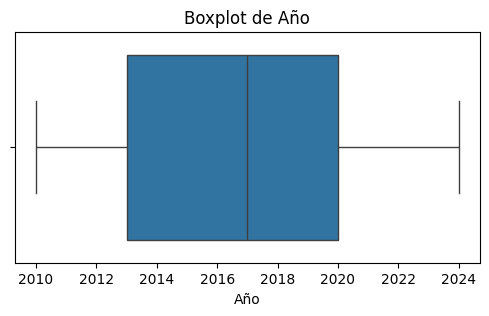

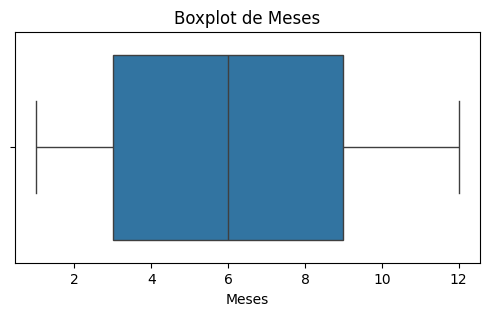

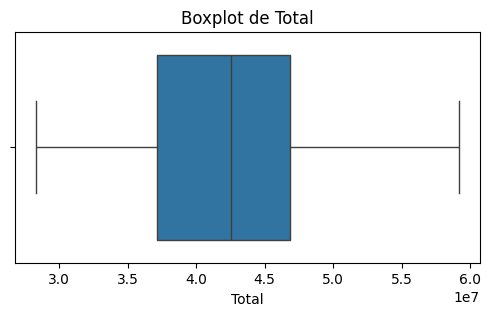

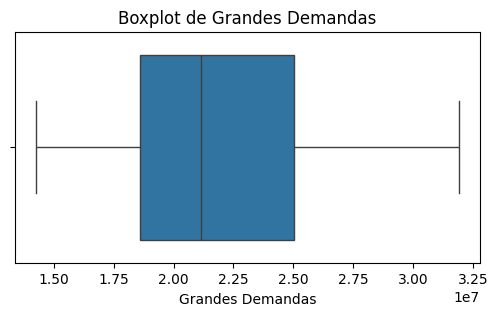

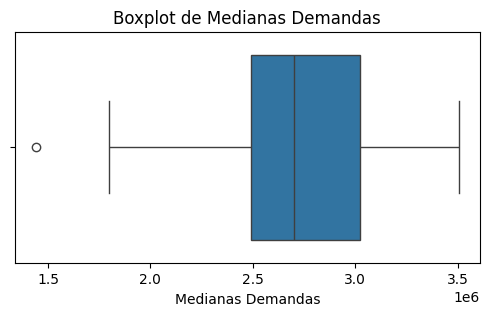

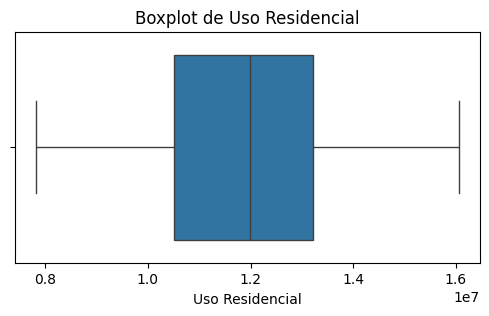

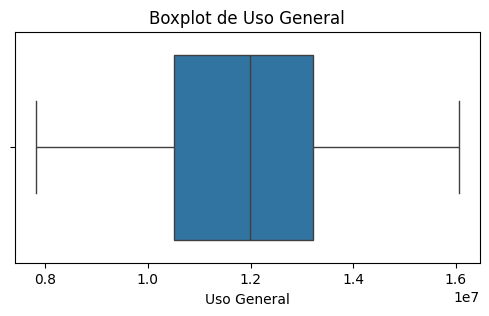

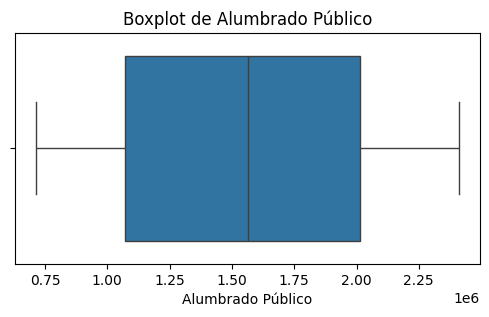

In [22]:
# Lista de columnas numéricas
numerical_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns

# Crear un boxplot para cada columna numérica
for column in numerical_columns:
    plt.figure(figsize=(6, 3))
    sb.boxplot(x=dataframe[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()

In [23]:
# Calcular los límites para identificar outliers en la columna "Medianas Demandas"
Q1 = dataframe['Medianas Demandas'].quantile(0.25)
Q3 = dataframe['Medianas Demandas'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores que están fuera de estos límites
outliers = dataframe[(dataframe['Medianas Demandas'] < lower_bound) | (dataframe['Medianas Demandas'] > upper_bound)]

print("Valores outliers en 'Medianas Demandas':")
print(outliers[['Medianas Demandas']])

Valores outliers en 'Medianas Demandas':
    Medianas Demandas
12          1441656.0


In [24]:
# Eliminar filas donde 'Medianas Demandas' sea un outlier
dataframe = dataframe.loc[(dataframe['Medianas Demandas'] >= lower_bound) & (dataframe['Medianas Demandas'] <= upper_bound)].copy()

# Verificar que el outlier ha sido eliminado
print("Descripción después de eliminar outliers:")
print(dataframe['Medianas Demandas'].describe())


Descripción después de eliminar outliers:
count    1.720000e+02
mean     2.727845e+06
std      3.586777e+05
min      1.795497e+06
25%      2.491352e+06
50%      2.707694e+06
75%      3.026122e+06
max      3.504559e+06
Name: Medianas Demandas, dtype: float64


# **Exportar Dataframe Limpio**

In [25]:
# Exportar el DataFrame limpio a un archivo Excel
dataframe.to_excel("dataframe_limpio.xlsx", index=False)

In [26]:
from google.colab import files
files.download("dataframe_limpio.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Desarrollo de los Modelos**

In [27]:
# Calcular la matriz de correlación
correlation_matrix = dataframe.corr()
correlation_matrix

,Año,Meses,Total,Grandes Demandas,Medianas Demandas,Uso Residencial,Uso General,Alumbrado Público
Año,1.000000,-0.064356,0.815887,0.860982,-0.274644,0.760981,0.760981,0.099002
Meses,-0.064356,1.000000,0.201402,0.135960,0.222934,0.275066,0.275066,-0.035395
Total,0.815887,0.201402,1.000000,0.954266,0.178470,0.933869,0.933869,0.428548
Grandes Demandas,0.860982,0.135960,0.954266,1.000000,-0.008064,0.815924,0.815924,0.229601
Medianas Demandas,-0.274644,0.222934,0.178470,-0.008064,1.000000,0.191315,0.191315,0.545305
Uso Residencial,0.760981,0.275066,0.933869,0.815924,0.191315,1.000000,1.000000,0.482050
Uso General,0.760981,0.275066,0.933869,0.815924,0.191315,1.000000,1.000000,0.482050
Alumbrado Público,0.099002,-0.035395,0.428548,0.229601,0.545305,0.482050,0.482050,1.000000


Se implementa un análisis de regresión utilizando seis modelos de Aprendizaje Automático: Regresión Lineal, Random Forest, XGBoost, K-Nearest Neighbors (K-NN), Gradient Boosting (GBP) y Support Vector Regressor (SVR). El objetivo es predecir el consumo total de energía eléctrica en Tierra del Fuego utilizando variables predictoras como el año y diferentes tipos de demanda (Grandes Demandas, Uso Residencial y Uso General). A partir de los resultados obtenidos de la matriz de correlación, se comparan las métricas de evaluación de cada modelo para identificar el que ofrece el mejor rendimiento en términos de precisión y ajuste a los datos.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import pandas as pd

# Preparar datos (suponiendo que 'dataframe' es tu DataFrame con los datos limpios)
X = dataframe[['Año', 'Grandes Demandas', 'Uso Residencial', 'Uso General']]  # Variables predictoras
y = dataframe['Total']  # Variable objetivo

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{name} Performance:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("-" * 30)


Linear Regression Performance:
MAE: 593311.0199298171
MSE: 509935476251.8032
R2 Score: 0.9871501765878316
------------------------------
Random Forest Performance:
MAE: 771443.9177782839
MSE: 950467966355.1423
R2 Score: 0.9760492334905612
------------------------------
XGBoost Performance:
MAE: 954526.1400571429
MSE: 1294538785682.2852
R2 Score: 0.9673790203449067
------------------------------


In [29]:
from sklearn.neighbors import KNeighborsRegressor

# Crear el modelo
knn_model = KNeighborsRegressor(n_neighbors=4)

# Entrenar el modelo
knn_model.fit(X_train, y_train)

# Predecir
y_pred_knn = knn_model.predict(X_test)

# Evaluar el modelo
print("KNN Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("MSE:", mean_squared_error(y_test, y_pred_knn))
print("R2 Score:", r2_score(y_test, y_pred_knn))
print("-" * 30)


KNN Performance:
MAE: 896625.4733071433
MSE: 1325128449014.1055
R2 Score: 0.9666081938573269
------------------------------


In [30]:
from sklearn.ensemble import GradientBoostingRegressor

# Crear el modelo
gb_model = GradientBoostingRegressor()

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Predecir
y_pred_gb = gb_model.predict(X_test)

# Evaluar el modelo
print("Gradient Boosting Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R2 Score:", r2_score(y_test, y_pred_gb))
print("-" * 30)


Gradient Boosting Performance:
MAE: 804154.6992162261
MSE: 973322234764.9203
R2 Score: 0.9754733306029281
------------------------------


In [31]:
from sklearn.svm import SVR

# Crear el modelo
svr_model = SVR()

# Entrenar el modelo
svr_model.fit(X_train, y_train)

# Predecir
y_pred_svr = svr_model.predict(X_test)

# Evaluar el modelo
print("SVR Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("R2 Score:", r2_score(y_test, y_pred_svr))
print("-" * 30)


SVR Performance:
MAE: 5426058.081412174
MSE: 41082866774206.5
R2 Score: -0.035243884568483264
------------------------------


# **Guardar el Mejor Modelo Entrenado**

In [38]:
import joblib

# Mejor modelo entrenado "Linear Regression"
best_model = models['Linear Regression']

from google.colab import drive
drive.mount('/content/drive')
joblib.dump(best_model, '/content/drive/My Drive/dataframe_entrenado.pkl')
print("Modelo guardado exitosamente.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Modelo guardado exitosamente.


Gráfico de Predicciones vs. Valores Reales

Un gráfico de dispersión (scatter plot) que compare las predicciones del modelo con los valores reales (y_test) es útil para ver cómo se comporta el modelo.

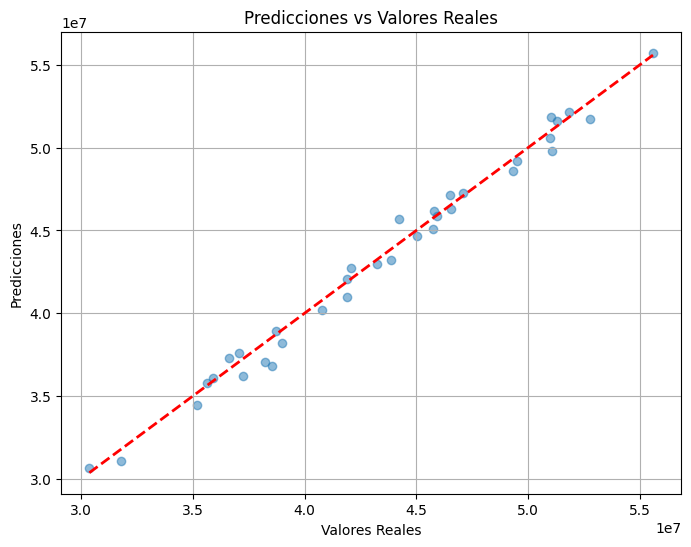

In [39]:
import matplotlib.pyplot as plt

# Realizar predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Graficar Predicciones vs Reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.grid(True)
plt.show()

Curva de Aprendizaje

Una curva de aprendizaje muestra cómo mejora el rendimiento del modelo a medida que se ajustan más datos o más tiempo de entrenamiento. Es especialmente útil para evaluar si el modelo está sobreajustando o no.

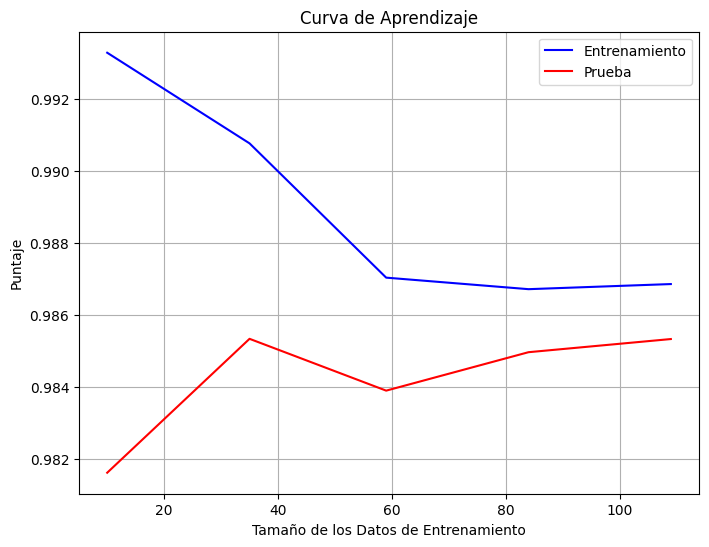

In [42]:
from sklearn.model_selection import learning_curve

# Obtener la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)

# Graficar la curva de aprendizaje
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Entrenamiento', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Prueba', color='red')
plt.title('Curva de Aprendizaje')
plt.xlabel('Tamaño de los Datos de Entrenamiento')
plt.ylabel('Puntaje')
plt.legend()
plt.grid(True)
plt.show()


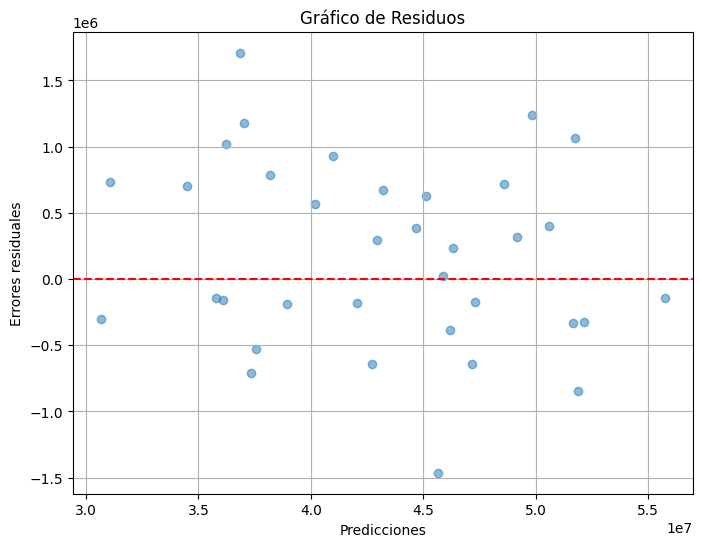

In [43]:
# Calcular los errores residuales
residuals = y_test - y_pred

# Graficar los residuos
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Errores residuales')
plt.title('Gráfico de Residuos')
plt.grid(True)
plt.show()


Histograma de Errores

Un histograma que muestra la distribución de los errores es útil para ver si los errores siguen una distribución normal o si hay algún sesgo en los resultados.

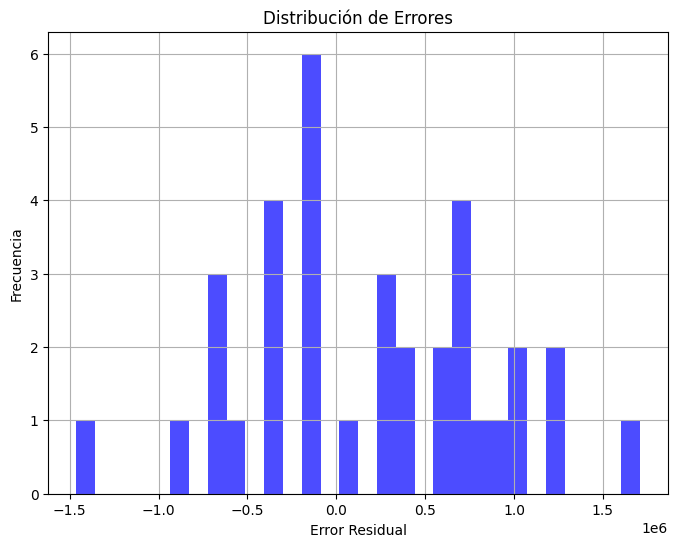

In [44]:
# Graficar el histograma de errores
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.title('Distribución de Errores')
plt.xlabel('Error Residual')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Interpretación de Coeficientes de Regresión Lineal

Para entender qué variables tienen un mayor impacto en el consumo energético, podemos visualizar los coeficientes de la Regresión Lineal.

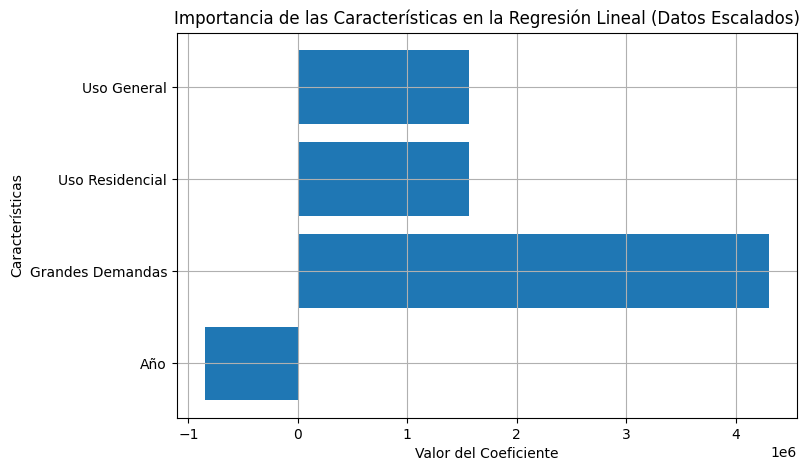

In [32]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar nuevamente el modelo de Regresión Lineal con datos escalados
linear_model = LinearRegression()
linear_model.fit(X_scaled, y)

# Obtener los coeficientes
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
})

# Graficar los coeficientes
plt.figure(figsize=(8, 5))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Características')
plt.title('Importancia de las Características en la Regresión Lineal (Datos Escalados)')
plt.grid()
plt.show()


Visualización de la Tendencia de Consumo a lo Largo del Tiempo

Para verificar si existe una tendencia de crecimiento o decrecimiento en el consumo energético a lo largo de los años, puedes usar una gráfica de línea con los datos originales o con las predicciones del modelo.

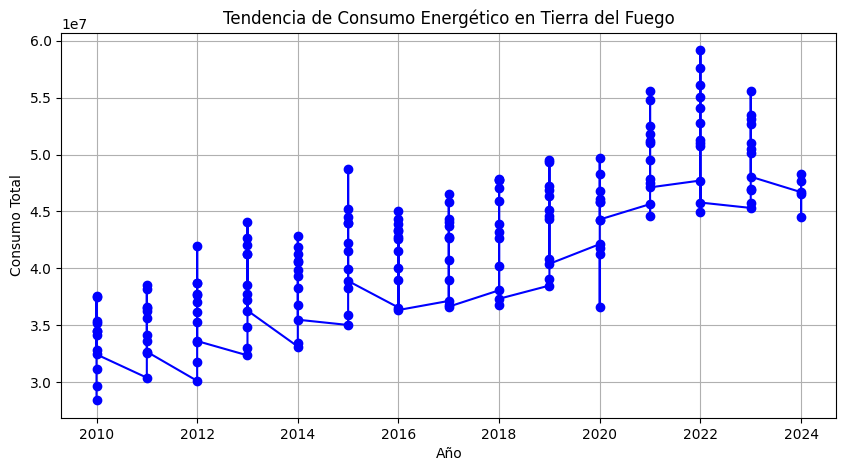

In [33]:
# Visualización de la tendencia de consumo a lo largo de los años
plt.figure(figsize=(10, 5))
plt.plot(dataframe['Año'], dataframe['Total'], marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('Consumo Total')
plt.title('Tendencia de Consumo Energético en Tierra del Fuego')
plt.grid()
plt.show()


---
## Resultados:
***R² Score (Coeficiente de Determinación):***
- Linear Regression: 0.9871
- Random Forest: 0.9770
- XGBoost: 0.9673
- KNN: 0.9702
- Gradient Boosting: 0.9707
- SVR: -0.00086

------------------------------

***MAE (Mean Absolute Error):***
- Linear Regression: 593311
- Random Forest: 753411
- XGBoost: 954526
- KNN: 972831
- Gradient Boosting: 964853
- SVR: 5313085

***MSE (Mean Squared Error):***
- Linear Regression: 509935476251.80
- Random Forest: 908937827897.05
- XGBoost: 1294538785682.28
- KNN: 1295405283402.43
- Gradient Boosting: 1274124230904.82
- SVR: 43627417287942.08

---

El **R² Score** mide la proporción de la varianza de la variable dependiente que se explica por el modelo. Un valor cercano a 1 indica un modelo muy bueno. En este caso, Linear Regression tiene el R² Score más alto (0.9946), lo que significa que es el modelo que mejor ajusta los datos.



El **MAE** mide el error promedio entre las predicciones y los valores reales. Mientras menor sea el MAE, mejor es el modelo en términos de precisión. En este caso, Linear Regression tiene el MAE más bajo (369930), lo que indica que es el modelo con el menor error absoluto en sus predicciones.



El **MSE** penaliza los errores grandes al elevarlos al cuadrado, por lo que un valor más bajo indica un mejor ajuste. Linear Regression también tiene el MSE más bajo, lo que refuerza aún más su rendimiento superior en comparación con los demás modelos.

---

***Otros Modelos***

SVR (Support Vector Regression) muestra un rendimiento significativamente peor, con un R² Score negativo (-0.00086), lo que indica que el modelo no ha logrado capturar ninguna relación significativa en los datos, por lo que debe ser descartado en este caso.

KNN (K-Nearest Neighbors) y Gradient Boosting son modelos competentes, pero no superan el rendimiento de Linear Regression en cuanto a las métricas de error y el R² Score.

---

1. ¿Es posible predecir con precisión el consumo de energía eléctrica en Tierra del Fuego utilizando técnicas de aprendizaje automático?

Sí, es posible predecir el consumo de energía eléctrica con buena precisión. El mejor rendimiento lo obtuvo el modelo de Regresión Lineal, con un R² de 0.987, lo que indica que el modelo explica el 98.7% de la variabilidad en el consumo total de energía. Aunque otros modelos como Random Forest y XGBoost también mostraron resultados aceptables, la Regresión Lineal destacó como el modelo más preciso.

---

2. ¿Qué características, como tipo de usuario y periodo, tienen mayor impacto en el consumo de energía eléctrica?

En este análisis, las características utilizadas fueron:

- Grandes Demandas
- Uso Residencial
- Uso General
- Año (con un impacto negativo)

De acuerdo con los coeficientes del modelo de Regresión Lineal, Grandes Demandas fue la característica con mayor influencia positiva en el consumo total de energía, seguida por Uso Residencial y Uso General. Sin embargo, se observó un coeficiente negativo para la variable Año, lo que indica una posible tendencia a la baja en el consumo a medida que pasan los años, después de un período de crecimiento.

---

3. ¿Existen tendencias de crecimiento o decrecimiento en el consumo energético a lo largo de los años?

Según la visualización de la tendencia de consumo de energía eléctrica en Tierra del Fuego, se observa una tendencia general al crecimiento a lo largo de los años. Aunque hay periodos donde el consumo disminuye, estas bajas son temporales y no afectan la tendencia alcista predominante. El pico histórico de consumo se alcanzó en el año 2022, lo cual podría estar asociado a factores específicos como condiciones climáticas extremas, un aumento en la actividad industrial o cambios en el comportamiento de los usuarios.

---

4. ¿Cuál es el rendimiento comparativo de diferentes algoritmos de aprendizaje automático en la predicción de consumo de energía eléctrica por tipo de usuario?
Los modelos evaluados mostraron el siguiente rendimiento:

Regresión Lineal fue el mejor, con un R² de 0.987, un MAE más bajo de 593,311, y un MSE de 509,935,476,251.
Random Forest también mostró un buen rendimiento, pero con un R² más bajo (0.977) y un mayor MAE (753,412).
XGBoost y Gradient Boosting presentaron resultados similares con R² cercanos a 0.97, pero con mayor error absoluto (MAE) comparado con la Regresión Lineal.
KNN tuvo un rendimiento similar al de XGBoost, pero levemente inferior.
SVR fue el peor modelo, con un R² negativo, lo que indica que no fue capaz de capturar la relación entre las variables predictoras y el consumo total.

---





